
# Fruit Inspection
*Eleonora Misino - Feb. 12, 2020*

----------------------------------
1. **Load Images**
2. **Fruit Segmentation**  
    2.1 Otsu's Method  
    2.2 Flood-fill Approach  
    2.3 Segmented Images
3. **Defects Detection**  
    3.1 Canny Edge Detector  
    3.2 Erosion  
4. **Conclusion**

---------------------------
## 1. Load Images
We have three pairs of images acquired through a **NIR (Near Infra-Red)** and a **color camera** with a little **parallax effect**.  
We load and display the images below.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


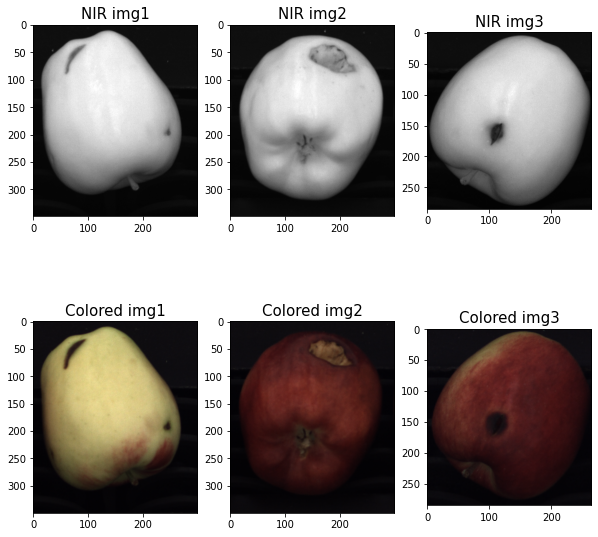

In [2]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# #NIR images
# img1 = cv2.imread("images/C0_000001.png", cv2.IMREAD_GRAYSCALE)
# img2 = cv2.imread("images/C0_000002.png", cv2.IMREAD_GRAYSCALE)
# img3 = cv2.imread("images/C0_000003.png", cv2.IMREAD_GRAYSCALE)


# #Colored images
# img1_c = cv2.cvtColor(cv2.imread("images/C1_000001.png", cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB) 
# img2_c = cv2.cvtColor(cv2.imread("images/C1_000002.png", cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB) 
# img3_c = cv2.cvtColor(cv2.imread("images/C1_000003.png", cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB) 

img_path = '/content/drive/MyDrive/Roba di Rosso/IP&CV_projects/Fruit_Inspection/images/'

# First task
## NIR images
img1 = cv2.imread(img_path + "first task/C0_000001.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img_path + "first task/C0_000002.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img_path + "first task/C0_000003.png", cv2.IMREAD_GRAYSCALE)

## Colored images
img1_c = cv2.cvtColor(cv2.imread(img_path + "first task/C1_000001.png", cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB) 
img2_c = cv2.cvtColor(cv2.imread(img_path + "first task/C1_000002.png", cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB) 
img3_c = cv2.cvtColor(cv2.imread(img_path + "first task/C1_000003.png", cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB) 

#Plot images
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("NIR img1", fontsize = 15)
plt.subplot(2,3,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("NIR img2", fontsize = 15)
plt.subplot(2,3,3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("NIR img3", fontsize = 15)
plt.subplot(2,3,4)
plt.imshow(img1_c)
plt.title("Colored img1", fontsize = 15)
plt.subplot(2,3,5)
plt.imshow(img2_c)
plt.title("Colored img2", fontsize = 15)
plt.subplot(2,3,6)
plt.imshow(img3_c)
plt.title("Colored img3", fontsize = 15)
plt.show()


------------------
## 2. Fruit Segmentation

We want to inspect the fruit to locate any defects, thus we need to remove the background and focus the analysis on the fruit (hereinafter called *foreground*). 

One of the most used tool to isolate the foreground is the so called ***Binary Mask***: a binary image having the same size as the target image and defining a region of interest (*ROI*).  
In particular: 
* mask pixel values of `1` indicate the image pixel belongs to the ROI;
* mask pixel values of `0` indicate the image pixel is part of the background.

We create our binary masks by **thresholding** the *gray-level histogram* of each NIR image displayed below.   

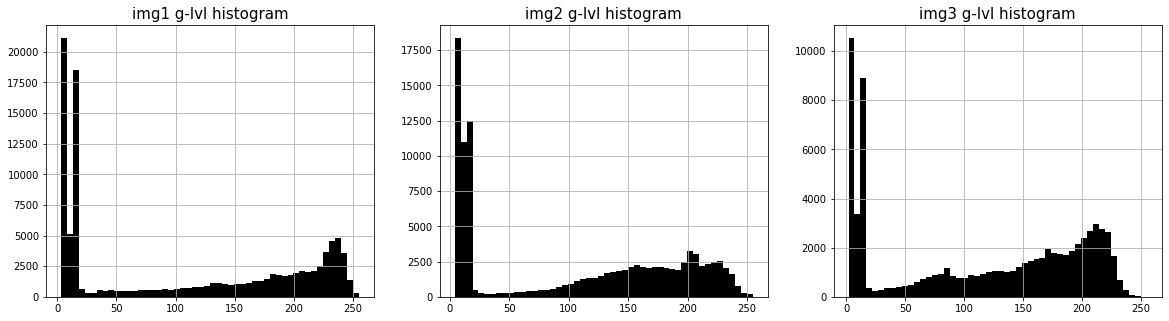

In [3]:
#Gray-level histograms
plt.figure(figsize = (20, 5), num = 'Gray-level histograms')
plt.subplot(1,3,1)
plt.hist(img1.flatten(), bins = 50, color = 'black');
plt.ticklabel_format()
plt.grid()
plt.title("img1 g-lvl histogram", fontsize = 15)
plt.subplot(1,3,2)
plt.hist(img2.flatten(), bins = 50, color = 'black');
plt.grid()
plt.title("img2 g-lvl histogram", fontsize = 15)
plt.subplot(1,3,3)
plt.hist(img3.flatten(), bins = 50, color = 'black');
plt.grid()
plt.title("img3 g-lvl histogram", fontsize = 15)
plt.show()

### 2.1  Otsu's Method

The three histograms clearly show the *background peaks*, but the gray-level values are spread over the whole range; thus it's **hard to manually find a correct threshold** for each image.    

How could we select a **meaningful threshold**?

One of the most well known approach is the [**Otsu's method**](https://en.wikipedia.org/wiki/Otsu%27s_method), which consists in maximizing the *between-group variance* of the background and the foreground.     
Therefore, this method provides the **thresholding value** which makes both the background and the foreground the **most homogeneous as possible**.


Once we have found the best threshold according to Otsu's method, we create our binary mask by setting at `0`  each pixel classified as background and at `1` each foreground pixel. 

The resulting masks exhibit some **holes** which coincide to the darkest regions of the fruit that have been **wrongly classified as background**.      
It's not surprising that the thresholding operation misclassified some pixels: as we highlighted, the intensity distribution is quite stretched and therefore the presence of *false negatives* and *false positives* is very likely. 

In [4]:
# Thresholding with Otsu's method
thresh = 25
maxValue = 1 
 
th1, dst1 = cv2.threshold(img1, thresh, maxValue, cv2.THRESH_OTSU)
th2, dst2 = cv2.threshold(img2, thresh, maxValue, cv2.THRESH_OTSU)
th3, dst3 = cv2.threshold(img3, thresh, maxValue, cv2.THRESH_OTSU);

In [5]:
print("The resulting thresholding values are:\n\n {:0.0f} for img1,\n {:0.0f} for img2,\n {:0.0f} for img3."\
      .format(th1, th2, th3))

The resulting thresholding values are:

 109 for img1,
 98 for img2,
 104 for img3.


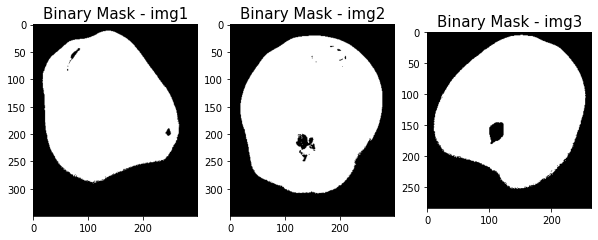

In [6]:
#Plot Binary Masks
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(dst1 * 255, cmap='gray', vmin=0, vmax=255)
plt.title("Binary Mask - img1", fontsize = 15)
plt.subplot(1,3,2)
plt.imshow(dst2 * 255, cmap='gray', vmin=0, vmax=255)
plt.title("Binary Mask - img2", fontsize = 15)
plt.subplot(1,3,3)
plt.imshow(dst3 * 255, cmap='gray', vmin=0, vmax=255)
plt.title("Binary Mask - img3", fontsize = 15)
plt.show()

### 2.2 Flood-fill approach
To correct the false negatives introduced by the thresholding, we use the [**flood-fill algorithm**](https://en.wikipedia.org/wiki/Flood_fill) to **fill the *connected components*** in the target image with a specified value.


In the lines below, we use the `floodFill` function of `OpenCV` to fill the holes inside our binary masks:
* we set at `1` the filling value and we prepare a $(h+2) \times (w+2)$ empty mask, where $h$ and $w$ are the dimensions of the original image;
* we fill the connected components in the original image and we invert the resulting binary image;
* we combine the original image with the new one to get a Binary Mask without holes. 

In [7]:
#Flood fill apporach

#Copy the masks
dst1_floodfill = dst1.copy()
dst2_floodfill = dst2.copy()
dst3_floodfill = dst3.copy()

# Masks used to flood filling
h, w = dst1.shape[:2]
m1 = np.zeros((h+2, w+2), np.uint8)
h, w = dst2.shape[:2]
m2 = np.zeros((h+2, w+2), np.uint8)
h, w = dst3.shape[:2]
m3 = np.zeros((h+2, w+2), np.uint8)

# Floodfill starting from point (0,0) with new value 1
seed_point = (0,0)
newValue = 1

cv2.floodFill(dst1_floodfill, m1, seed_point, newValue);
cv2.floodFill(dst2_floodfill, m2, seed_point, newValue);
cv2.floodFill(dst3_floodfill, m3, seed_point, newValue);

#Invert the resulting images
holes1 = np.invert(dst1_floodfill > 0)
holes2 = np.invert(dst2_floodfill > 0)
holes3 = np.invert(dst3_floodfill > 0)
 
#Combine the two images to get the final binary masks
mask1 = dst1 | holes1
mask2 = dst2 | holes2
mask3 = dst3 | holes3

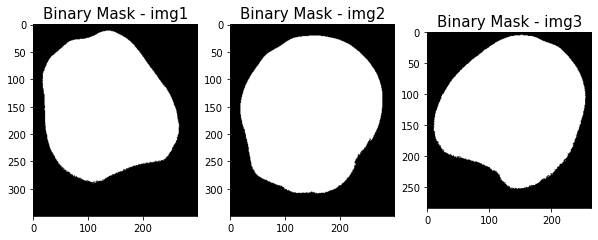

In [8]:
#Plot filled masks
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Binary Mask - img1", fontsize = 15)
plt.imshow(mask1 * 255, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.title("Binary Mask - img2", fontsize = 15)
plt.imshow(mask2 * 255, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.title("Binary Mask - img3", fontsize = 15)
plt.imshow(mask3 * 255, cmap='gray', vmin=0, vmax=255)
plt.show()

### 2.3 Segmented Images

We apply the binary masks on both the NIR and the colored images: the resulting images present a completely **homogeneous background** and the **unmodified fruit**.

In [9]:
#Create the masks for the colored images
mask1_RGB = cv2.cvtColor(mask1, cv2.COLOR_GRAY2BGR) 
mask2_RGB = cv2.cvtColor(mask2, cv2.COLOR_GRAY2BGR)
mask3_RGB = cv2.cvtColor(mask3, cv2.COLOR_GRAY2BGR) 

#Apply the masks
m_img1_c = img1_c * mask1_RGB
m_img2_c = img2_c * mask2_RGB
m_img3_c = img3_c * mask3_RGB

Img1 = img1 * mask1
Img2 = img2 * mask2
Img3 = img3 * mask3

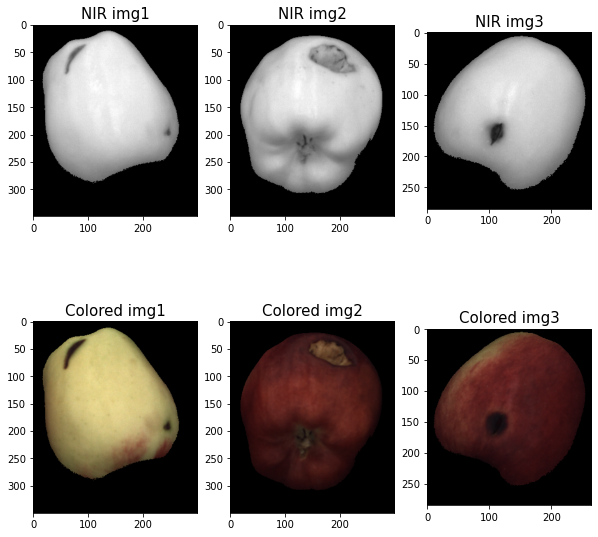

In [10]:
# Plot segmented images
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(Img1, cmap='gray', vmin=0, vmax=255)
plt.title("NIR img1", fontsize = 15)
plt.subplot(2,3,2)
plt.imshow(Img2, cmap='gray', vmin=0, vmax=255)
plt.title("NIR img2", fontsize = 15)
plt.subplot(2,3,3)
plt.imshow(Img3, cmap='gray', vmin=0, vmax=255)
plt.title("NIR img3", fontsize = 15)
plt.subplot(2,3,4)
plt.imshow(m_img1_c)
plt.title("Colored img1", fontsize = 15)
plt.subplot(2,3,5)
plt.imshow(m_img2_c)
plt.title("Colored img2", fontsize = 15)
plt.subplot(2,3,6)
plt.imshow(m_img3_c)
plt.title("Colored img3", fontsize = 15)
plt.show()

-----------------
## 3. Defects Detection

### 3.1 Canny Edge Detector
The imperfections show sharp edges and so we can use an **edge detector** to "draw" their contours. 

There exist several edge detectors and all of them are based on finding the **discontinuities in brightness**. The one we are going to use is named [**Canny Edge Detector**](https://en.wikipedia.org/wiki/Canny_edge_detector) and it is implemented in `OpenCV` in the `Canny` function.

`Canny` function has two parameters (*high-threshold* and *low-threshold*) which determine the **hysteresis process** of thresholding and which have to be carefully tuned.  
There are no universal guidelines to select the best parameter values, so we decided to apply the *Otsu's method* on the masked NIR image to set the *high-threshold* parameter and we set the *low-threshold* equal to half *high-threshold*.

In [11]:
#Otsu's method
h_th1, _ = cv2.threshold(Img1, thresh, maxValue, cv2.THRESH_OTSU)
h_th2, _ = cv2.threshold(Img2, thresh, maxValue, cv2.THRESH_OTSU)
h_th3, _ = cv2.threshold(Img3, thresh, maxValue, cv2.THRESH_OTSU)

print("The high-threshold values are:\n\n {:0.0f} for Img1,\n {:0.0f} for Img2,\n {:0.0f} for Img3."\
      .format(h_th1, h_th2, h_th3))


#Canny's detector
Canny_1 = cv2.Canny(Img1, h_th1 / 2, h_th1)
Canny_2 = cv2.Canny(Img2, h_th2 / 2, h_th2)
Canny_3 = cv2.Canny(Img3, h_th3 / 2, h_th3)

The high-threshold values are:

 99 for Img1,
 89 for Img2,
 90 for Img3.


### 3.2 Erosion
The resulting images show the contours of both the fruit and the imperfections, and we can also notice some *spurious* edges.  
We would like to obtain a binary image with only the fruit defects as foreground, therefore we have to remove the unnecessary parts.  
A very useful tool is the `erode` function of `OpenCV`, which performs the operation of [**erosion**](https://en.wikipedia.org/wiki/Erosion_(morphology)) on the target image.  


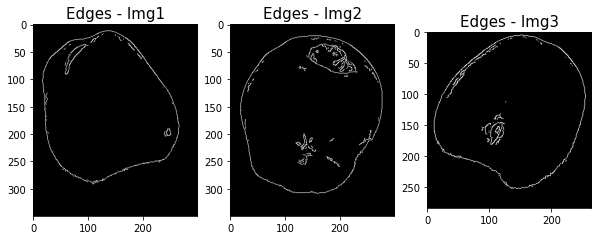

In [12]:
# Plot edges found by Canny's detector
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Canny_1, cmap = 'gray')
plt.title("Edges - Img1", fontsize = 15)
plt.subplot(1,3,2)
plt.imshow(Canny_2, cmap = 'gray')
plt.title("Edges - Img2", fontsize = 15)
plt.subplot(1,3,3)
plt.imshow(Canny_3, cmap = 'gray')
plt.title("Edges - Img3", fontsize = 15)
plt.show()

The `erode` function takes 3 arguments:
* the original image; 
* the *kernel* (the matrix with which image is convolved);
* the *number of iterations* which will determine the degree of erosion. 

For our purpose, we take as **kernel** a $5 \times 5$ empty matrix and we set at $5$ the **number of iterations**.

We proceed by eroding the original binary mask (the one generated using Otsu's thresholding and filled with the flood-fill approach); then we use the eroded binary mask to extract only the imperfections contours from the image provided by the edge detector.

In the lines below we build the *ad hoc* function `defects` and we generate the three "*defects*" images.

In [13]:
#Erosion

def defects(canny_img, mask, kernel_size = (5,5), n_iter = 1):
    
    #Erosion
    kernel = np.ones(kernel_size, np.uint8) 
    eroded_mask = cv2.erode(mask, kernel, iterations = n_iter)

    #Apply mask
    canny_mask = (np.invert(canny_img)*mask).flatten()
    empty = np.zeros(canny_mask.shape)
    i = 0
    
    for n in eroded_mask.flatten():
        i += 1
        if n :
            if canny_mask[i] == 0:
                empty[i] = 255
    
    return empty.reshape(canny_img.shape)


In [14]:
defects1 = defects(Canny_1, mask1, n_iter=5)
defects2 = defects(Canny_2, mask2, n_iter=5)
defects3 = defects(Canny_3, mask3, n_iter=5)

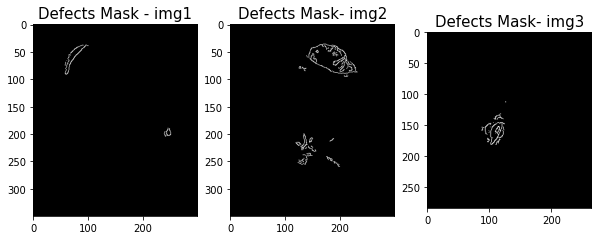

In [15]:
# Plot the defects
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(defects1, cmap = 'gray')
plt.title("Defects Mask - img1", fontsize = 15)
plt.subplot(1,3,2)
plt.imshow(defects2, cmap = 'gray')
plt.title("Defects Mask- img2", fontsize = 15)
plt.subplot(1,3,3)
plt.imshow(defects3, cmap = 'gray')
plt.title("Defects Mask- img3", fontsize = 15)
plt.show()

------------------------------------------------
## 4. Conclusion

We use the "*defects*" images to draw the detected defects both on the NIR and the colored images.

As expected, in the resulting colored images the detected defects do **not perfectly match** the real imperfections contours: this is because we apply the edge detector on the NIR images and, as mentioned at the beginning, the pairs of images are affected by the **parallax effect**.

We also notice that the apple **sepals** have been classified as **defects** in *img2*: the sepals exhibit a sharp change in intensity wich has been detected by *Canny Edge Detector*.

In [16]:
def draw_defects_Gray(img, defects):
  
    img_RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    h,w,bpp = img_RGB.shape
    
    for py in range(0,h):
        for px in range(0,w):
            if(defects[py][px]):            
                img_RGB[py][px][0] = 255
                img_RGB[py][px][1] = 0
                img_RGB[py][px][2] = 255
    
    return img_RGB

def draw_defects_RGB(img, defects):

    h,w,bpp = img.shape
    img_copy = img.copy()
    
    for py in range(0,h):
        for px in range(0,w):
            if(defects[py][px]):            
                img_copy[py][px][0] = 255
                img_copy[py][px][1] = 0
                img_copy[py][px][2] = 255
    
    return img_copy

In [17]:
defects_img1 = draw_defects_Gray(img1, defects1)
defects_img2 = draw_defects_Gray(img2, defects2)
defects_img3 = draw_defects_Gray(img3, defects3)

defects_img1_RGB = draw_defects_RGB(img1_c, defects1)
defects_img2_RGB = draw_defects_RGB(img2_c, defects2)
defects_img3_RGB = draw_defects_RGB(img3_c, defects3)

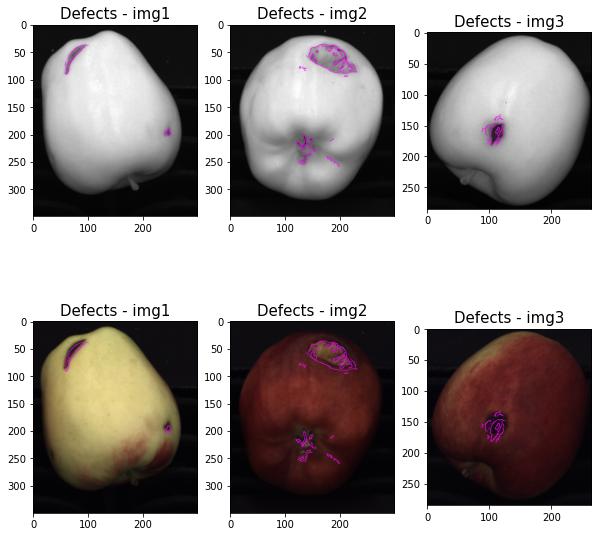

In [18]:
# Plot colored images with defects
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(defects_img1)
plt.title("Defects - img1", fontsize = 15)
plt.subplot(2,3,2)
plt.imshow(defects_img2)
plt.title("Defects - img2", fontsize = 15)
plt.subplot(2,3,3)
plt.imshow(defects_img3)
plt.title("Defects - img3", fontsize = 15)
plt.subplot(2,3,4)
plt.imshow(defects_img1_RGB)
plt.title("Defects - img1", fontsize = 15)
plt.subplot(2,3,5)
plt.imshow(defects_img2_RGB)
plt.title("Defects - img2", fontsize = 15)
plt.subplot(2,3,6)
plt.imshow(defects_img3_RGB)
plt.title("Defects - img3", fontsize = 15)
plt.show()

--------------------------------------------------

*This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US).*

--------------------------------------------------